In [1]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import scipy

In [2]:
diabetecDF = pd.read_csv("Resources/Diabetic_Causes.csv")
diabetecDF.head()

,State,Adult_Obesity_Rate,High_School_Obesity_Rate,Per_Capita_Alcohol_Consumption,Percentage_of_smoker
0,AK,29.7,14.0,5.88,19.0
1,AL,33.5,16.1,4.01,21.5
2,AR,35.9,21.7,3.63,22.4
3,AZ,28.9,16.6,4.63,14.7
4,CA,24.7,13.9,4.66,11.0


In [3]:
diabetecDF.columns

Index(['State', 'Adult_Obesity_Rate', 'High_School_Obesity_Rate',
       'Per_Capita_Alcohol_Consumption', 'Percentage_of_smoker'],
      dtype='object')

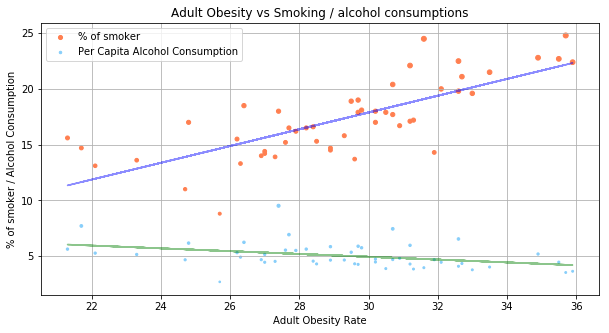

In [4]:
#Scatter Plot
fig, ax = plt.subplots(figsize=(10, 5))

#slope, intercept, r_value, p_value, std_err = stats.linregress (diabetecDF['Adult_Obesity_Rate'], diabetecDF['Percentage_of_smoker'])
#line = slope*diabetecDF['Adult_Obesity_Rate'] + intercept

ax.scatter(diabetecDF['Adult_Obesity_Rate'], diabetecDF['Percentage_of_smoker'], s=diabetecDF["Percentage_of_smoker"],
          facecolors = 'Coral', label="% of smoker")
ax.scatter(diabetecDF['Adult_Obesity_Rate'], diabetecDF['Per_Capita_Alcohol_Consumption'], s=diabetecDF["Per_Capita_Alcohol_Consumption"],
          facecolors = 'LightSkyBlue', label="Per Capita Alcohol Consumption")

ax.set_xlabel("Adult Obesity Rate")
ax.set_ylabel("% of smoker / Alcohol Consumption")
ax.set_title("Adult Obesity vs Smoking / alcohol consumptions")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

p1 = np.polyfit(diabetecDF['Adult_Obesity_Rate'], diabetecDF['Percentage_of_smoker'], 1)
p2 = np.polyfit(diabetecDF['Adult_Obesity_Rate'], diabetecDF['Per_Capita_Alcohol_Consumption'], 1)
plt.plot(diabetecDF['Adult_Obesity_Rate'], np.polyval(p1, diabetecDF['Adult_Obesity_Rate']), color='b', alpha=0.45)
plt.plot(diabetecDF['Adult_Obesity_Rate'], np.polyval(p2, diabetecDF['Adult_Obesity_Rate']), color='g', alpha=0.45)

plt.savefig("Images/AdultObesityVsSmoking.png")

plt.grid()
plt.show()

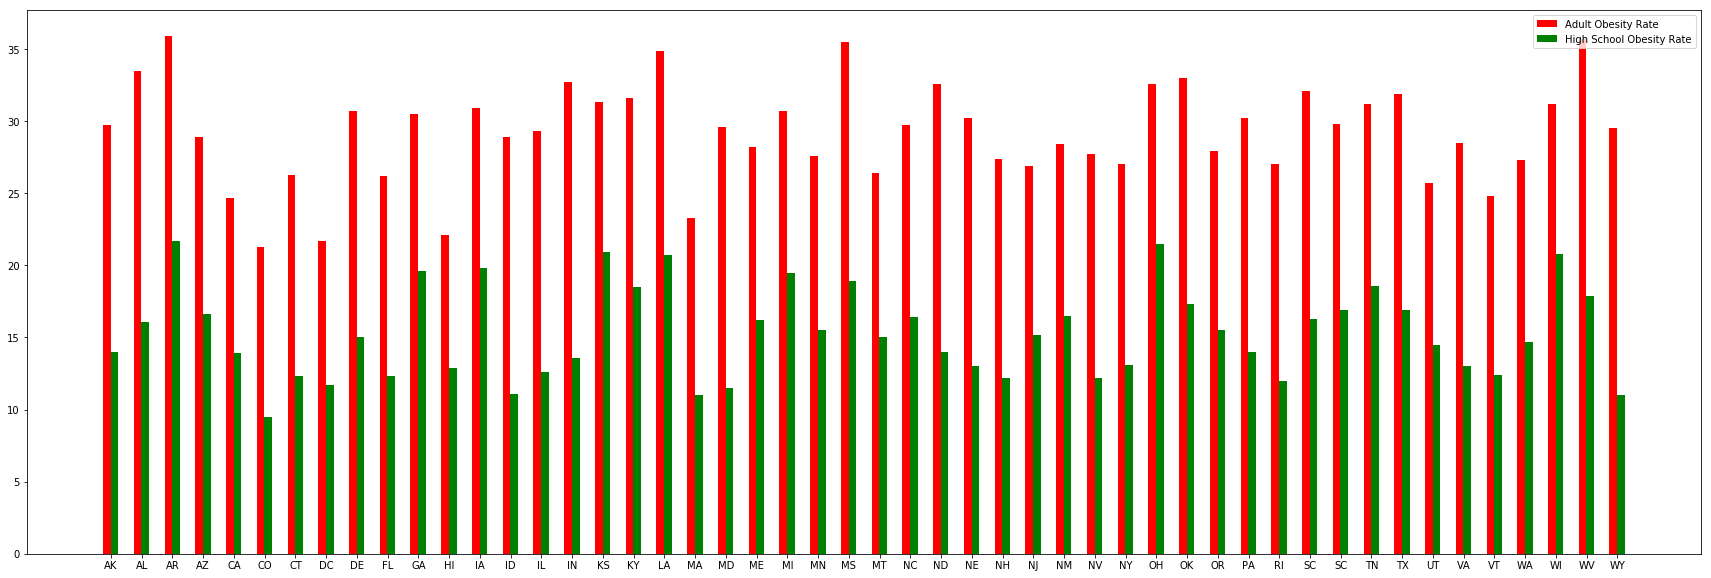

In [5]:
#Construct a Bar Chart for State vs Adult Obesity Rate
x_axis = np.arange(len(diabetecDF['State']))*3
width = 0.75
y_axis = list(diabetecDF['Adult_Obesity_Rate'])
y1_axis = list(diabetecDF['High_School_Obesity_Rate'])
tick_locations = [value+0.4 for value in x_axis]

fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(x_axis, y_axis, width, color='red', label="Adult Obesity Rate")
rects2 = ax.bar(x_axis+width, y1_axis, width, color='green', label="High School Obesity Rate")

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.set_xticks(tick_locations)
ax.set_xticklabels(diabetecDF['State'])



plt.show()

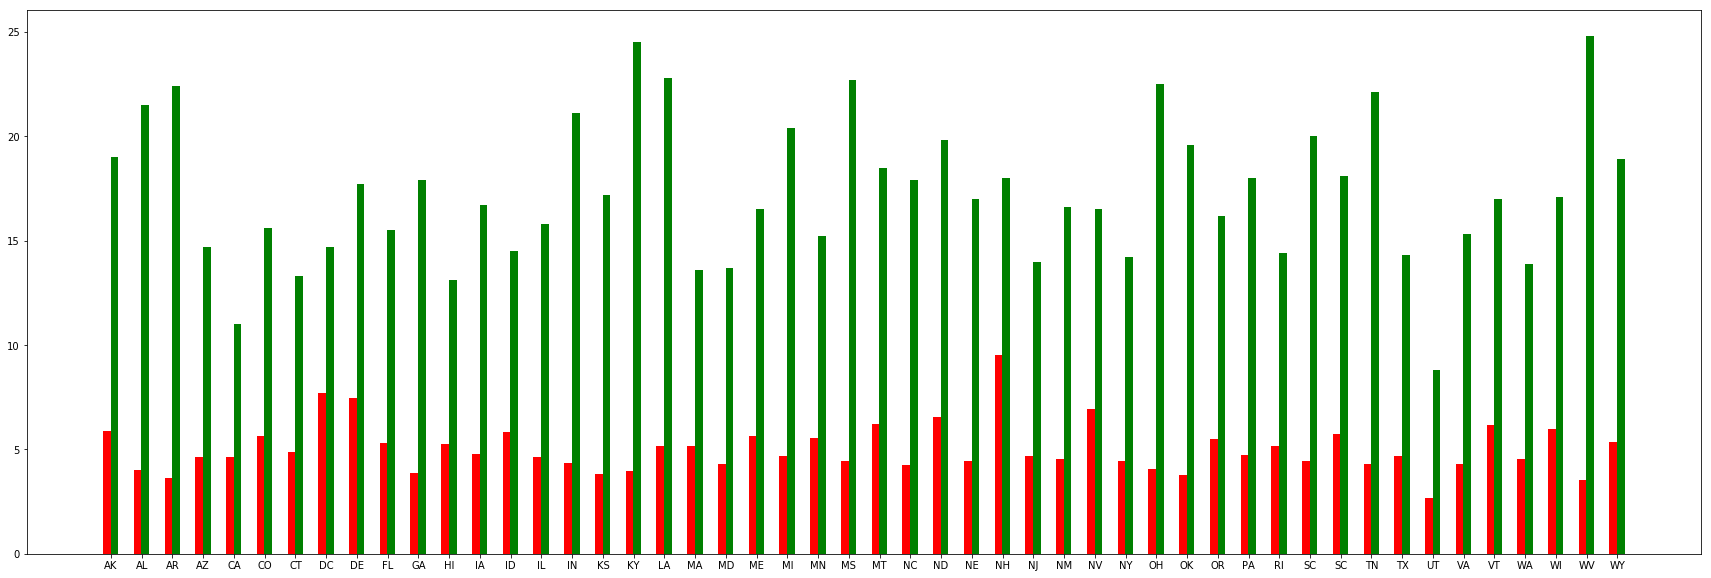

In [6]:
#Construct a Bar Chart for State vs Adult Obesity Rate
x_axis = np.arange(len(diabetecDF['State']))*3
width = 0.75
y_axis = list(diabetecDF['Per_Capita_Alcohol_Consumption'])
y1_axis = list(diabetecDF['Percentage_of_smoker'])
tick_locations = [value+0.4 for value in x_axis]

fig, ax = plt.subplots(figsize=(30,10))
rects1 = ax.bar(x_axis, y_axis, width, color='red')
rects2 = ax.bar(x_axis+width, y1_axis, width, color='green')

ax.set_xticks(tick_locations)
ax.set_xticklabels(diabetecDF['State'])

plt.show()